In [21]:
%matplotlib inline

import sqlite3
from dataclasses import dataclass, field

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

from release import count_release_files, Release


con = sqlite3.connect('main.db')


In [22]:

project_name = 'postgres'

proj_dir = Path('../SOURCE') / project_name

sql = f'''
select tag, date(creator_dt)
from projects join releases on projects.id = releases.project_id
where name = '{project_name}'
order by 2
'''
raw_releases = con.execute(sql).fetchall()

raw_releases = [Release(tag, date) for tag,date in raw_releases]
print(f'{len(raw_releases)=}')
# assert 0, [raw_releases[:3]]


No major.minor (PG95-1_01=)
No major.minor (Release_1_0_2=)
No major.minor (Release_2_0=)
No major.minor (Release_2_0_0=)
No major.minor (PG95-1_08=)
No major.minor (PG95-1_09=)
No major.minor (REL2_0=)
No major.minor (REL6_1=)
No major.minor (REL6_1_1=)
No major.minor (REL6_2=)
No major.minor (REL6_2_1=)
No major.minor (REL6_3=)
No major.minor (release-6-3=)
No major.minor (REL6_3_2=)
No major.minor (REL6_4_2=)
No major.minor (REL6_5=)
No major.minor (REL6_5_1=)
No major.minor (REL6_5_2=)
No major.minor (REL6_5_3=)
No major.minor (REL7_0=)
No major.minor (REL7_0_2=)
No major.minor (REL7_0_3=)
No major.minor (REL7_1_BETA=)
No major.minor (REL7_1_BETA2=)
No major.minor (REL7_1_BETA3=)
No major.minor (REL7_1=)
No major.minor (REL7_1_1=)
No major.minor (REL7_1_2=)
No major.minor (REL7_1_3=)
No major.minor (REL7_2_BETA1=)
No major.minor (REL7_2_BETA2=)
No major.minor (REL7_2_BETA3=)
No major.minor (REL7_2_BETA4=)
No major.minor (REL7_2_BETA5=)
No major.minor (REL7_2_RC1=)
No major.minor (R

[]


<AxesSubplot:title={'center':'postgres num files per release'}>

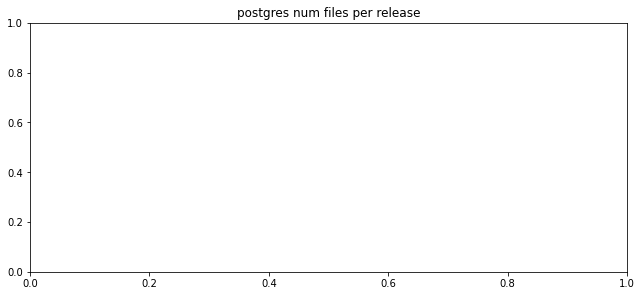

In [23]:

# TODO: strip Nones??
releases = [rel for rel in raw_releases if rel.majormin]

# Create figure
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title=f"{project_name} num files per release")

count = [count_release_files(proj_dir, rel.raw_label) for rel in releases]

release_names = [rel.raw_label for rel in releases]
print(release_names)
sns.lineplot(x=release_names, y=count)
